In [60]:
import pandas as pd
import seaborn as sb
# import plotly
# import plotly.plotly as py
import matplotlib.pyplot as plt
sb.set_style('whitegrid')
import scipy.stats as stat

In [26]:
data2022 = pd.read_csv('data/2022.csv', delimiter = ',')

In [27]:
data2022.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [28]:
data2022.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [29]:
data2022.rename(columns = {'Explained by: GDP per capita':'GDP', 'Explained by: Social support':'Social Support'}, inplace = True)

In [30]:
data2022['GDP'].unique()

array(['1,892', '1,953', '1,936', '2,026', '1,945', '2,209', '1,920',
       '1,997', '1,826', '1,852', '1,931', '1,900', '2,129', '1,924',
       '1,886', '1,982', '1,867', '1,815', '1,907', '1,863', '1,854',
       '1,810', '1,584', '1,998', '1,870', '1,897', '2,149', '1,719',
       '1,808', '1,615', '1,834', '1,362', '1,838', '1,804', '1,736',
       '1,793', '1,715', '1,462', '1,274', '1,668', '1,732', '1,550',
       '1,651', '1,105', '1,552', '1,705', '1,758', '1,265', '1,904',
       '1,748', '1,591', '1,219', '1,835', '1,111', '1,760', '1,592',
       '1,703', '1,851', '1,268', '1,535', '1,417', '1,296', '1,069',
       '1,562', '1,452', '1,468', '1,393', '1,538', '1,689', '1,256',
       '1,508', '1,409', '1,397', '1,573', '1,352', '1,252', '1,484',
       '1,685', '1,957', '1,434', '0,966', '0,984', '1,625', '1,476',
       '1,382', '1,094', '1,505', '1,439', '1,425', '1,458', '0,785',
       '1,060', '1,239', '1,363', '0,636', '1,411', '0,950', '1,208',
       '0,578', '0,9

In [34]:
data2022.dropna(inplace =True)

In [35]:
data2022['GDP'] = data2022['GDP'].str.replace(',', '').astype(int)


In [24]:
data2022['GDP'] = pd.to_numeric(data2022['GDP'], errors='coerce').fillna(0).astype(int)

In [36]:
data2022['GDP']

0      1892
1      1953
2      1936
3      2026
4      1945
       ... 
141    1503
142     785
143     947
144    1392
145     758
Name: GDP, Length: 146, dtype: int64

In [37]:
data2022['GDP'] = data2022['GDP'].fillna(data2022['GDP'].mean())

In [40]:
data2022['Happiness score'] = data2022['Happiness score'].str.replace(',', '').astype(int)


In [41]:
data2022.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'GDP', 'Social Support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

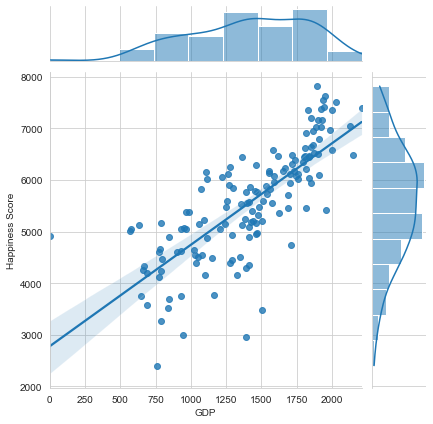

In [64]:
sb.jointplot(x=data2022['GDP'],y=data2022['Happiness score'],kind='reg')
plt.xlabel('GDP')
plt.ylabel('Happiness Score')
plt.savefig('Picture1.png')
plt.show()

In [62]:
import scipy.stats as stats

corr, p_value = stats.pearsonr(data2022['GDP'], data2022['Happiness score'])
print("The correlation coefficient is: ", corr)
print("The p-value is: ", p_value)

The correlation coefficient is:  0.7636771320095697
The p-value is:  3.728911941227192e-29
